In [11]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# reading dataset
data = pd.read_csv('/content/test_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
data.shape

(367, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [18]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [19]:
data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [20]:
data.drop(['Loan_ID'], axis =1 ,inplace = True)

In [21]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [22]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

1.Handling Missing Values

In [23]:
# checking for missing values
data.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [24]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [25]:

data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [26]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

   missing values handled

2. **Outlier Detection And Handling**

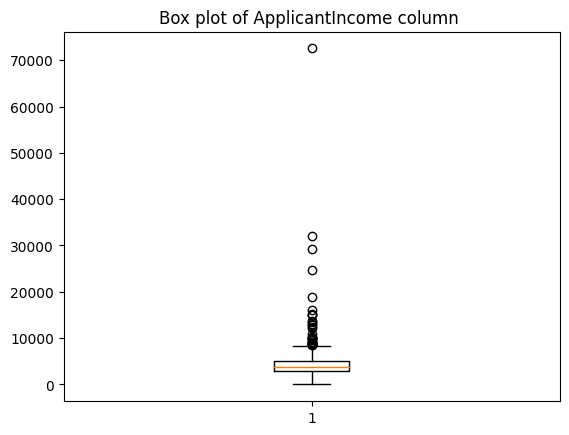

In [27]:
#outlier detection using boxplot of col 'ApplicantIncome'
plt.boxplot(data['ApplicantIncome'])
plt.title('Box plot of ApplicantIncome column ')
plt.show()

REMOVING OUTLIERS USING IQR METHOD

In [28]:
Q1 =data['ApplicantIncome'].quantile(.25)
Q2 =data['ApplicantIncome'].quantile(.5)
Q3 =data['ApplicantIncome'].quantile(.75)

In [29]:
IQR =Q3-Q1
upper=Q3 + (1.5*IQR)
lower =Q1-(1.5*IQR)
print(upper,lower)

8354.0 -430.0


In [30]:
data[(data ['ApplicantIncome'] <lower) | (data['ApplicantIncome'] >upper)].index

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

In [31]:
#We are not dropping all outliers as it is too many. Instead we are just dropping outliers above 20000

In [32]:
#outlier indexes
out_index=np.where(data['ApplicantIncome']>30000)
print(out_index)

(array([ 81, 143]),)


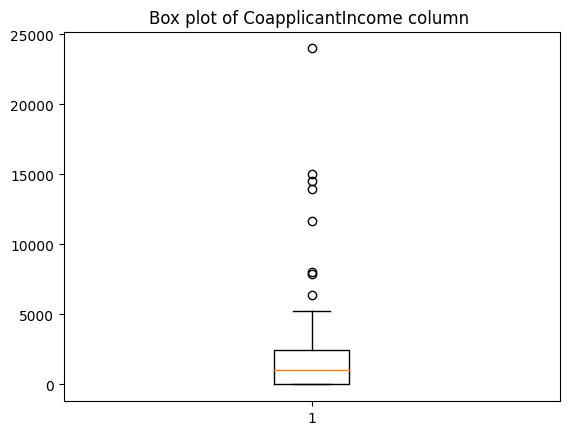

In [33]:
#outlier detection using boxplot of col 'ApplicantIncome'
plt.boxplot(data['CoapplicantIncome'])
plt.title('Box plot of CoapplicantIncome column ')
plt.show()

REMOVING OUTLIERS USING IQR METHOD

In [36]:
Q1 =data['CoapplicantIncome'].quantile(.25)
Q2 =data['CoapplicantIncome'].quantile(.5)
Q3 =data['CoapplicantIncome'].quantile(.75)

In [37]:
data[(data ['CoapplicantIncome'] <lower) | (data['CoapplicantIncome'] >upper)].index

Int64Index([25, 230, 237, 284, 351], dtype='int64')

In [39]:
data =data.drop([25, 230, 237, 284, 351], inplace = True)

3.**Encoding**

In [43]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [45]:
# using Label Encoding for ordinal features
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])


In [46]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


**4.SCALING**

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
data.loc[:,['LoanAmount']]= sc.fit_transform(data[['LoanAmount']])

In [55]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,3.620000e+02,361.000000,338.000000,367.000000
mean,0.839237,0.634877,0.228883,0.226158,4805.599455,1569.577657,2.208178e-16,342.537396,0.825444,1.079019
std,0.442036,0.482122,0.420687,0.548791,4910.685399,2334.232099,1.001384e+00,65.156643,0.380150,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.764513e+00,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2864.000000,0.000000,-5.855340e-01,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3786.000000,1025.000000,-1.816623e-01,360.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5060.000000,2430.500000,3.568334e-01,360.000000,1.000000,2.000000
max,2.000000,1.000000,1.000000,2.000000,72529.000000,24000.000000,6.753509e+00,480.000000,1.000000,2.000000


In [56]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,-0.426433,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,-0.165344,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,1.172736,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,-0.589614,360.0,NaN,2
4,LP001051,1,0,0,1,0,3276,0,-0.948611,360.0,1.0,2
